Names: (double-click to edit)

Usual python initializations

In [39]:
import math
import csv
import matplotlib.pyplot as plot

## Hipparcos data

This is part of the Hipparcos catalog. The fields are documented at https://heasarc.gsfc.nasa.gov/W3Browse/all/hipparcos.html

In [40]:
hip_data={}
with open('/home/jupyter-awsteiner/hip_small.csv') as csvfile:
    reader = csv.reader(csvfile)
    names=next(reader)
    for i in range(0,len(names)):
        hip_data[names[i]]=[]
    for row in reader:
        for i in range(0,len(row)):
            if row[i] is not '':
                hip_data[names[i]].append(row[i])                   
print('Column names:',names)
print('Number of columns:',len(names))
print('First column',names[0])

Column names: ['catalog', 'ID', 'Proxy', 'RAhms', 'DEdms', 'Vmag', 'Varflag', 'r_Vmag', 'RAdeg', 'DEdeg', 'Astroref', 'Plx', 'pmRA', 'pmDE', 'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA', 'PLx:RA', 'PLx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA', 'pmDE:DE', 'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', 'HIP', 'BTmag', 'e_BTmag', 'VTmag', 'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V', 'V-I', 'e_V-I', 'r_V-I', 'CombMag', 'Hpmag', 'e_HPmag', 'Hpscat', 'o_Hpmag', 'm_Hpmag', 'Hpmax', 'Hpmin', 'Period', 'MvarType', 'morevar', 'morephoto', 'CCDM', 'n_CCDM', 'Nsys', 'Ncomp', 'Multflag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho', 'e_rho', 'dHp', 'e_dHp', 'survey', 'chart', 'notes', 'HD', 'BD', 'CoD', 'CPD', 'V-Ired', 'SPType', 'r_SPType', '']
Number of columns: 79
First column catalog


You can refer to any column with it's name, e.g.
<code>gaia_data["lum_val"]</code>. This next line
uses the <code>len()</code> function to print out the
number of rows in the <tt>lum_val</tt> column.


In [41]:
print(len(hip_data["ID"]))

11821


## Making an HR diagram:

<font color="red">Task 1: First, the Hipparcos data has some extra spaces in it,
so we have to use the "strip()" function to remove thoese before 
converting the strings to floating-point numbers. Our goal is to make
    an HR diagram with absolute magnitude as a function of B-V color. 
    The catalog doesn't have absolute magnitude, but it does have 
    apparent magnitude and parallax. I have created three variables
    inside the code below, mag, parallax, and color which store
    apparent magnitude, parallax (in milliarcseconds) and then B-V
    color, respectively. Note also that I have an additional if statement
    to ensure the parallax is not negative. Modify the lines "dist=0" and "absmag=0" to
    compute the distance and absolute magnitude, and then also modify
    the plot x and y-limits to get something looking like an HR diagram.</font>

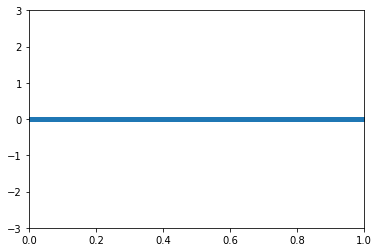

In [43]:
absmag_clean=[]
color_clean=[]
for i in range(0,len(hip_data["Hpmag"])):
    if (hip_data["Hpmag"][i].strip() is not ''
        and hip_data["B-V"][i].strip() is not ''
        and hip_data["Plx"][i].strip() is not ''):
        mag=float(hip_data["Hpmag"][i].strip())
        parallax=float(hip_data["Plx"][i].strip())
        color=float(hip_data["B-V"][i].strip())
        if parallax>0:
            dist=0
            absmag=0
            absmag_clean.append(absmag)
            color_clean.append(color)
plot.xlim([0,1])
plot.ylim([-3,3])
plot.scatter(color_clean,absmag_clean,marker='.')
plot.show()

## Uncertainty in the magnitude and parallax

Here is a histogram for the uncertainty in the parallax. Notice how I use
the "plot.yscale('log')" code to select a log scale for the y-axis.
The default is "plot.yscale('linear')".

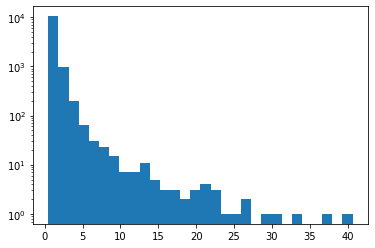

In [47]:
temp=[]
for i in range(0,len(hip_data["e_Plx"])):
    if hip_data["e_Plx"][i].strip() is not '':
        temp.append(float(hip_data["e_Plx"][i].strip()))
plot.yscale('log')
plot.hist(temp,bins=30)
plot.show()

<font color="red">Task 2: Create a similar histogram for the error in the apparent magnitude from the column "e_HPmag"</font>

In [48]:
# your code here

<font color="red">Task 3: See if you can create a cleaner HR diagram by choosing only the points for which the errors in the parallax and magnitude are small. To do this you
    can add an "if" statement which only adds the points if the errors are below some
threshold value.</font>

In [ ]:
absmag_clean=[]
color_clean=[]
for i in range(0,len(hip_data["Hpmag"])):
    if (hip_data["Hpmag"][i].strip() is not ''
        and hip_data["B-V"][i].strip() is not ''
        and hip_data["Plx"][i].strip() is not ''):
        mag=float(hip_data["Hpmag"][i].strip())
        parallax=float(hip_data["Plx"][i].strip())
        color=float(hip_data["B-V"][i].strip())
        if (parallax>0 and SOME_CODE_HERE):
            dist=0
            absmag=0
            absmag_clean.append(absmag)
            color_clean.append(color)
plot.xlim([0,1])
plot.ylim([-3,3])
plot.scatter(color_clean,absmag_clean,marker='.')
plot.show()